In [44]:
import numpy as np
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split

In [45]:
df_class = pd.read_excel("従業員データ.xlsx")
df_class.head()

,社員番号,年次,月給(万円),管理職,社員満足度,Result
0,E153570,13,52,0,4.0,0
1,E233970,15,63,1,4.0,0
2,E822851,16,54,0,4.2,1
3,E942154,11,50,0,4.0,0
4,E527102,8,35,0,2.1,0


In [46]:
y = df_class["Result"]
X = df_class[["年次","月給(万円)","管理職","社員満足度"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y
)

In [51]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight="balanced", max_depth=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
y_train_pred = model.predict(X_train) #学習データでの予測結果
cr = classification_report(y_train, y_train_pred, output_dict=True)
pd.DataFrame(cr)

,0,1,accuracy,macro avg,weighted avg
precision,0.816239,0.439655,0.691429,0.627947,0.715100
recall,0.746094,0.542553,0.691429,0.644323,0.691429
f1-score,0.779592,0.485714,0.691429,0.632653,0.700665
support,256.000000,94.000000,0.691429,350.000000,350.000000


In [53]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,  y_pred) 
cr = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(cr) #テストデータでの予測結果

,0,1,accuracy,macro avg,weighted avg
precision,0.765306,0.326923,0.613333,0.546115,0.648404
recall,0.681818,0.425000,0.613333,0.553409,0.613333
f1-score,0.721154,0.369565,0.613333,0.545360,0.627397
support,110.000000,40.000000,0.613333,150.000000,150.000000


c:\Users\kawam\Documents\IT勉強\practice_pythondata\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


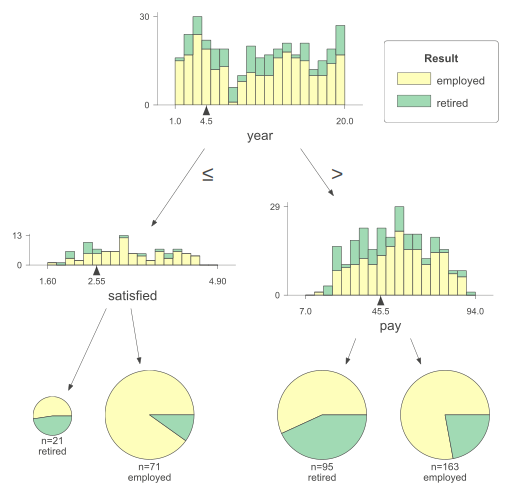

In [55]:
import dtreeviz
viz = dtreeviz.model(model, 
                X_train, y_train,
                feature_names=["year", "pay", "position", "satisfied"],
                target_name="Result",
                class_names=["employed","retired"]
                )
viz.view(scale=1.5)